In [4]:
##Estimación de indicadores de seguridad
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Using GitHub PAT from the git credential store.




rlang (1.1.4 -> 1.1.6) [CRAN]
glue  (1.7.0 -> 1.8.0) [CRAN]
cli   (3.6.3 -> 3.6.5) [CRAN]


Installing 3 packages: rlang, glue, cli

Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\Rtmp4WaY6A\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\Rtmp4WaY6A\remotesf2840c06a44\cpyp-ipdp-funcionespgd-8b2a39e/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Warning message:
"package 'funcionespgd' is in use and will not be installed"


In [5]:
residuos <- openxlsx::read.xlsx("datos_medioambiente_20250601.xlsx", sheet="Residuos")%>%
  
rename(
  year = periodo,
  estimado = tendencia_deseable,
  superior = tendencia_inercial,
  inferior=tendencia_disruptivo

)

residuos

,year,superior,estimado,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2012,6150.000,6150.000,6150.000
2,2013,7606.000,7606.000,7606.000
3,2014,8090.000,8090.000,8090.000
4,2015,8677.000,8677.000,8677.000
5,2016,8712.000,8712.000,8712.000
6,2017,7862.000,7862.000,7862.000
7,2018,8107.000,8107.000,8107.000
8,2019,7990.000,7990.000,7990.000
9,2020,6941.000,6941.000,6941.000


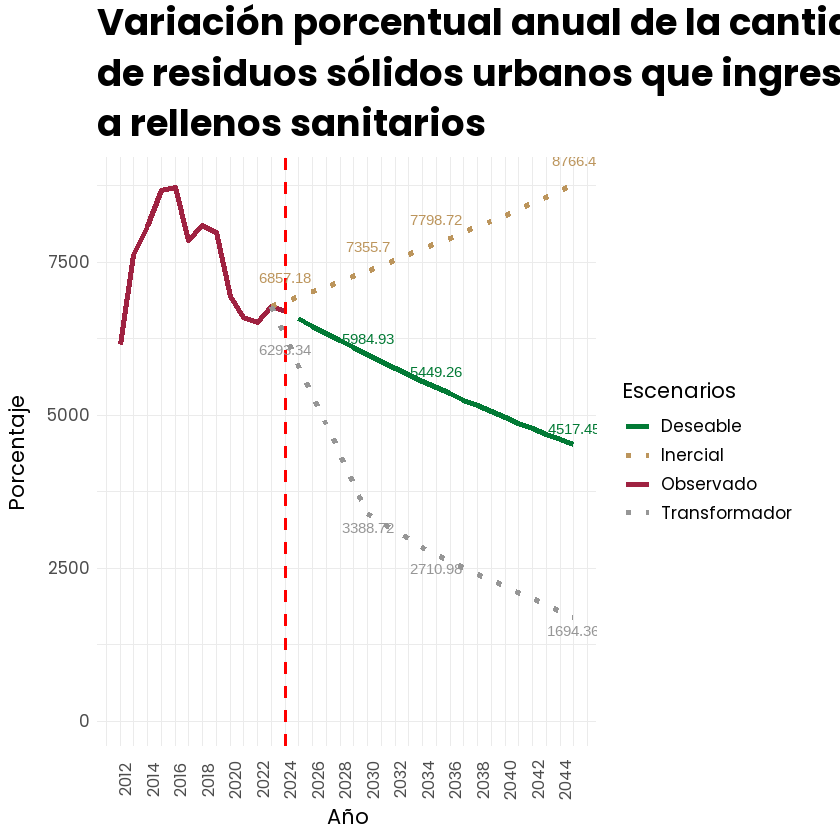

In [10]:
grafica_bonita(
  data = residuos,
  x = "year",
  y = "estimado",
  titulo = "Variación porcentual anual de la cantidad 
de residuos sólidos urbanos que ingresan
a rellenos sanitarios",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 20
)

ggsave("residuos_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

In [7]:
aire <- openxlsx::read.xlsx("datos_medioambiente_20250601.xlsx", sheet="CalidadAire")%>%
  
rename(
  year = periodo,
  estimado = tendencia_deseable,
  superior = tendencia_inercial,
  inferior=tendencia_disruptivo

)%>%
#redondear a sin decimales
  mutate(across(c(estimado, superior, inferior), ~ round(.x, 0)))

aire

,year,superior,estimado,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2010,161,161,161
2,2011,132,132,132
3,2012,164,164,164
4,2013,165,165,165
5,2014,161,161,161
6,2015,150,150,150
7,2016,141,141,141
8,2017,125,125,125
9,2018,135,135,135


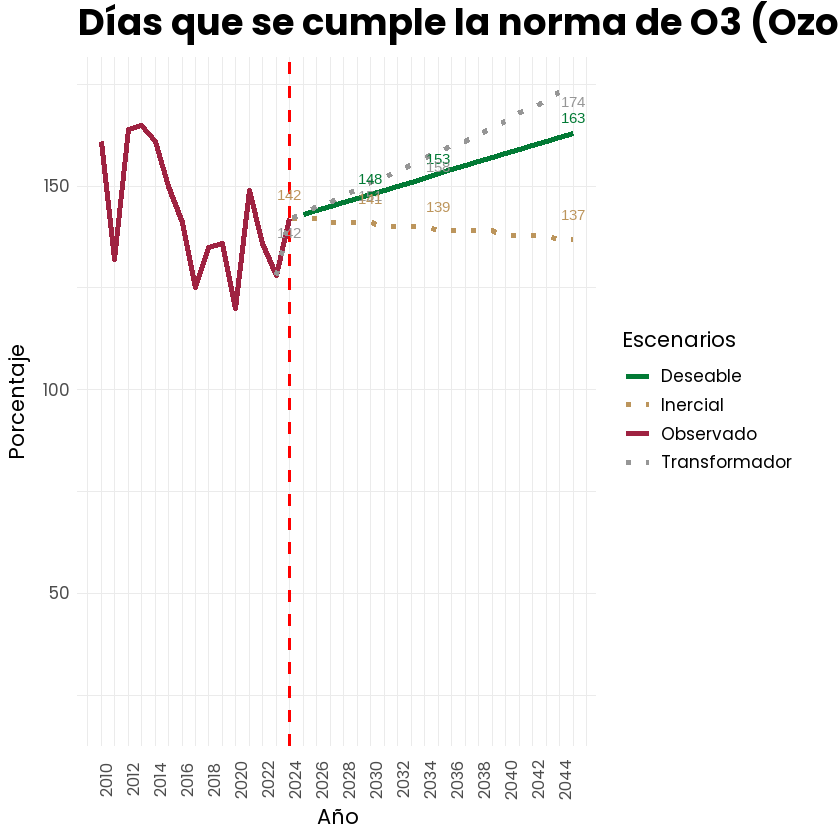

In [9]:
grafica_bonita(
  data = aire,
  x = "year",
  y = "estimado",
  titulo = "Días que se cumple la norma de O3 (Ozono)",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 20
)

ggsave("dias_aire_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")